In [1]:
import numpy as np
import pandas as pd


In [2]:
# Load the CSV file into a DataFrame
df_laptops = pd.read_csv('data/laptops.csv')

# Display the total count of rows
print(f"Total count of rows: {len(df_laptops)}")

# Display the first few rows of the dataframe
df_laptops.head()

Total count of rows: 2160


,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


In [3]:
df_laptops.columns = df_laptops.columns.str.lower().str.replace(' ', '_')

In [8]:
df_laptops.head()

,laptop,status,brand,model,cpu,ram,storage,storage_type,gpu,screen,touch,final_price
0,asus_expertbook_b1_b1502cba-ej0436x_intel_core...,new,asus,expertbook,intel_core_i5,8,512,ssd,NaN,15.6,no,1009.00
1,alurin_go_start_intel_celeron_n4020/8gb/256gb_...,new,alurin,go,intel_celeron,8,256,ssd,NaN,15.6,no,299.00
2,asus_expertbook_b1_b1502cba-ej0424x_intel_core...,new,asus,expertbook,intel_core_i3,8,256,ssd,NaN,15.6,no,789.00
3,msi_katana_gf66_12uc-082xes_intel_core_i7-1270...,new,msi,katana,intel_core_i7,16,1000,ssd,rtx_3050,15.6,no,1199.00
4,hp_15s-fq5085ns_intel_core_i5-1235u/16gb/512gb...,new,hp,15s,intel_core_i5,16,512,ssd,NaN,15.6,no,669.01


In [5]:
df_laptops.dtypes[df_laptops_laptops.dtypes == 'object'].index

Index(['laptop', 'status', 'brand', 'model', 'cpu', 'storage_type', 'gpu',
       'touch'],
      dtype='object')

In [6]:
strings = list(df_laptops.dtypes[df_laptops.dtypes == 'object'].index)
strings

['laptop', 'status', 'brand', 'model', 'cpu', 'storage_type', 'gpu', 'touch']

In [7]:
for col in strings:
    df_laptops[col] = df_laptops[col].str.lower().str.replace(' ','_')

In [9]:
for col in df_laptops.columns:
    print(col)
    print(df_laptops[col].unique()[:5])
    print(df_laptops[col].nunique())
    print()

laptop
['asus_expertbook_b1_b1502cba-ej0436x_intel_core_i5-1235u/8gb/512gb_ssd/15.6"'
 'alurin_go_start_intel_celeron_n4020/8gb/256gb_ssd/15.6"'
 'asus_expertbook_b1_b1502cba-ej0424x_intel_core_i3-1215u/8gb/256gb_ssd/15.6"'
 'msi_katana_gf66_12uc-082xes_intel_core_i7-12700h/16gb/1tb_ssd/rtx3050/15.6"'
 'hp_15s-fq5085ns_intel_core_i5-1235u/16gb/512gb_ssd/15.6"']
2160

status
['new' 'refurbished']
2

brand
['asus' 'alurin' 'msi' 'hp' 'lenovo']
27

model
['expertbook' 'go' 'katana' '15s' 'crosshair']
121

cpu
['intel_core_i5' 'intel_celeron' 'intel_core_i3' 'intel_core_i7'
 'amd_ryzen_5']
28

ram
[ 8 16 32 12  4]
9

storage
[ 512  256 1000   64  128]
12

storage_type
['ssd' 'emmc' nan]
2

gpu
[nan 'rtx_3050' 'rtx_4060' 'rtx_4050' 'rtx_3060']
44

screen
[15.6 17.3 14.  16.1 13.3]
29

touch
['no' 'yes']
2

final_price
[1009.    299.    789.   1199.    669.01]
1440



In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: ylabel='Count'>

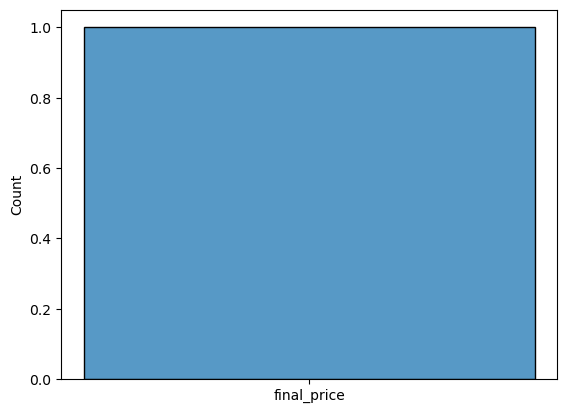

In [12]:
sns.histplot('final_price')

In [13]:
df_laptops.isnull().sum()

laptop             0
status             0
brand              0
model              0
cpu                0
ram                0
storage            0
storage_type      42
gpu             1371
screen             4
touch              0
final_price        0
dtype: int64

In [15]:
median_ram = df_laptops['ram'].median()
print(median_ram)


16.0


In [16]:
from sklearn.model_selection import train_test_split

# Shuffle and split with seed 42
df_laptops_full_train, df_laptops_test = train_test_split(df_laptops, test_size=0.2, random_state=42)
df_laptops_train, df_laptops_val = train_test_split(df_laptops_full_train, test_size=0.25, random_state=42)


In [17]:
df_laptops_train_zero = df_laptops_train.fillna(0)
df_laptops_val_zero = df_laptops_val.fillna(0)


In [18]:
mean_ram = df_laptops_train['ram'].mean()
df_laptops_train_mean = df_laptops_train.fillna(mean_ram)
df_laptops_val_mean = df_laptops_val.fillna(mean_ram)


In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Model with fill = 0
model_zero = LinearRegression()
model_zero.fit(df_laptops_train_zero[['ram', 'storage', 'screen']], df_laptops_train_zero['final_price'])
preds_zero = model_zero.predict(df_laptops_val_zero[['ram', 'storage', 'screen']])
rmse_zero = np.sqrt(mean_squared_error(df_laptops_val_zero['final_price'], preds_zero))

# Model with fill = mean
model_mean = LinearRegression()
model_mean.fit(df_laptops_train_mean[['ram', 'storage', 'screen']], df_laptops_train_mean['final_price'])
preds_mean = model_mean.predict(df_laptops_val_mean[['ram', 'storage', 'screen']])
rmse_mean = np.sqrt(mean_squared_error(df_laptops_val_mean['final_price'], preds_mean))

print(f'RMSE with 0: {rmse_zero}')
print(f'RMSE with mean: {rmse_mean}')


RMSE with 0: 581.3534560340069
RMSE with mean: 579.9500219676877


In [20]:
from sklearn.linear_model import Ridge

for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
    model_ridge = Ridge(alpha=r)
    model_ridge.fit(df_laptops_train_zero[['ram', 'storage', 'screen']], df_laptops_train_zero['final_price'])
    preds_ridge = model_ridge.predict(df_laptops_val_zero[['ram', 'storage', 'screen']])
    rmse_ridge = np.sqrt(mean_squared_error(df_laptops_val_zero['final_price'], preds_ridge))
    print(f'RMSE with r={r}: {round(rmse_ridge, 2)}')


RMSE with r=0: 581.35
RMSE with r=0.01: 581.35
RMSE with r=0.1: 581.35
RMSE with r=1: 581.35
RMSE with r=5: 581.35
RMSE with r=10: 581.34
RMSE with r=100: 581.24


In [26]:
rmse_scores = []

for seed in range(10):
    df_full_train, df_test = train_test_split(df_laptops, test_size=0.2, random_state=seed)
    df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=seed)
    
    # Fill missing values with 0
    df_laptops_train_zero = df_train.fillna(0)
    df_laptops_val_zero = df_val.fillna(0)
    
    # Train model
    model = LinearRegression()
    model.fit(df_laptops_train_zero[['ram', 'storage', 'screen']], df_laptops_train_zero['final_price'])
    preds = model.predict(df_laptops_val_zero[['ram', 'storage', 'screen']])
    rmse = np.sqrt(mean_squared_error(df_laptops_val_zero['final_price'], preds))
    
    rmse_scores.append(rmse)

# Calculate standard deviation
import numpy as np
std = np.std(rmse_scores)
print(f'Standard Deviation: {round(std, 3)}')


Standard Deviation: 36.29


In [27]:
rmse_scores

[604.3916437823893,
 683.5623746923876,
 620.3100043276589,
 557.5128551278667,
 580.7790889996938,
 580.0864421816785,
 579.2010343748781,
 584.5760374901033,
 551.0384624452792,
 617.0012851255333]

In [31]:
# Split with seed 9
df_full_train, df_test = train_test_split(df_laptops, test_size=0.2, random_state=9)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=9)

# Combine train and validation sets
df_full_train = pd.concat([df_train, df_val])

# Fill missing values with 0
df_full_train_zero = df_full_train.fillna(0)
df_test_zero = df_test.fillna(0)

# Train model with r=0.001
model_final = Ridge(alpha=0.001)
model_final.fit(df_full_train_zero[['ram', 'storage', 'screen']], df_full_train_zero['final_price'])

# Evaluate on test
preds_test = model_final.predict(df_test_zero[['ram', 'storage', 'screen']])
rmse_test = np.sqrt(mean_squared_error(df_test_zero['final_price'], preds_test))

print(f'Test RMSE: {round(rmse_test, 2)}')


Test RMSE: 535.08
